<a href="https://colab.research.google.com/github/yexf308/MAT592/blob/main/homework/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2
## Homework guideline
- The deadline is Mar 10th 10:30am. Submission after the deadline will not be graded.

- Submit your work(your reasoning and your code) as a SINGLE .ipynb document. Please rename the document as _HW1_YOURNAME.ipynb_ (for example, _HW1_FELIX.ipynb_). You are responsible for checking that you have correctly submitted the correct document. If your code cannot run, you may receive NO point.

- Please justify all short answers with a brief explanation.

- You only use the Python packages included in the following cell. You are not allowed to use other advanced package or modules unless you are permitted to.

- In your final submission include the plots produced by the unedited code as presented below, as well as any additional plots produced after editing the code during the course of a problem. You may find it necessary to copy/paste relevant code into additional cells to accomplish this.

- Feel free to use the lecture notes and other resources but work on your own!

In [ ]:
%pylab inline


Populating the interactive namespace from numpy and matplotlib


# Q1: Numpy practice problems (10pt)


### Q1.1  Find the most frequent value in an array $Z$ (*)

In [ ]:
Z = np.random.randint(0,10,500)
# insert your code here
np.bincount(Z).argmax()

### Q1.2 Find the nearest value from a given value $z$ in an array $Z$ (*)

In [ ]:
Z = np.random.uniform(0,1,10)
z = 0.5
# insert your code here
index = (np.abs(Z-z)).argmin()
Z[index]

# Q2: Implementation of derivative from HW1 (15pt)
### Q2.1 Softmax function (5pt) (**)
Implement a function ```softmax(z)``` such that calculate the sigmoid function. Verify it with several examples. For example, ```softmax([1000, 2000, 3000])```



In [ ]:
# your function starts here
def softmax(z):
    z_max = max(z)
    e = np.exp(z-z_max)
    return e / e.sum(axis=0)

z = np.array([1000, 2000, 3000])
softmax(z)

array([0., 0., 1.])

### Q2.2 Derivative of Softmax function (10pt) (**)
Implement a function ```Dsoftmax(z)``` such that caluclate the gradient of softmax function. Verify it with several examples.

In [ ]:
# your function starts here

def Dsoftmax(z):
  Z = softmax(z)
  N = Z.shape[0]
  G = np.ones([N,N])
  for i in range(N):
    for j in range(N):
      if i == j:
        G[i,j] = Z[i] * (1-Z[i])
      else:
        G[i,j] = -Z[i]*Z[j]
  return G
z = np.array([1000, 2000, 3000])
Dsoftmax(z)


array([[ 0., -0., -0.],
       [-0.,  0., -0.],
       [-0., -0.,  0.]])

# Modified MNIST
I modified the the original MNIST gray-scale image dataset, where samples of digit 9 belong to class 1, and otherwise class 0. Now it becomes binary logistic regression.
It contains a training set of images $\texttt{Xtr}$ with labels $\texttt{Ytr}$ and a testing set
of images $\texttt{Xte}$ with labels $\texttt{Yte}$. There are 6000 samples in training sets and 1000 samples in testing sets.

In [ ]:
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()
Xtr                   = train_X[0:6000, :]
train_y_part          = train_y[0:6000]
Ytr                   = zeros(train_y_part.size)
Ytr[train_y_part==9]=1

Xte                   = test_X[0:1000,:]
test_y_part           = test_y[0:1000]
Yte  = zeros(test_y_part.size)
Yte[test_y_part==9]=1

print('Xtr: ' + str(Xtr.shape))
print('Ytr: ' + str(Ytr.shape))
print('Xte: '  + str(Xte.shape))
print('Yte: '  + str(Yte.shape))



11501568/11490434 [==============================] - 0s 0us/step
Xtr: (6000, 28, 28)
Ytr: (6000,)
Xte: (1000, 28, 28)
Yte: (1000,)


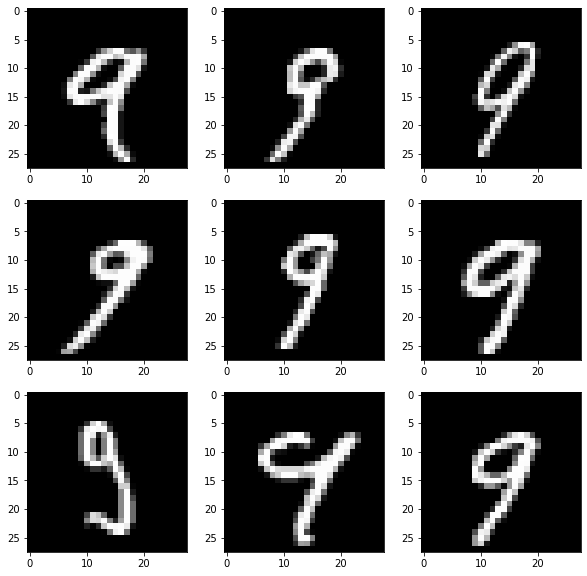

In [ ]:
fig, axs = plt.subplots(3, 3,figsize=(10,10))
axs = axs.ravel()
index = where(Ytr>0)[0]
for i in range(9):
    axs[i].imshow(Xtr[index[i]], cmap=pyplot.get_cmap('gray'))

## Q3: Logistic regression (30pt)

---


### 1. Data preparation for training and testing (10pt) (*)
Prepare your matrix $\mathbf{X}$ and your output label $\mathbf{y}$ for the training data. Please count the number of 9 out of these 60000 training set. What is the dimension of the matrix $\mathbf{X}$. Don't forget to do the same preparation for the testing data.

In [ ]:
 #@title Q3.1 your code starts here

X_tr = Xtr.reshape(Xtr.shape[0],Xtr.shape[1]*Xtr.shape[2])
Xtrain = hstack([ones((Xtr.shape[0],1)),X_tr])
ytrain = Ytr
print("The number of 9 is", int(sum(ytrain)))
print(Xtrain.shape)

X_te = Xte.reshape(Xte.shape[0],Xte.shape[1]*Xte.shape[2])
Xtest = hstack([ones((Xte.shape[0],1)),X_te])
ytest = Yte
print(Xtest.shape)

The number of 9 is 601
(6000, 785)
(1000, 785)


### **Your Answer:**


---
### 2. Logistic regression (20pt) (**)

Perform logistic regression with the sigmoid activation function using **mini-batches descent method**. The mini-batch size is 25, the learning rate is $\eta_t = \frac{1}{(1+2t)^3}$ and total iteration number is $50$. You might need to restart the training with better initial conditions. Modify my code to accomodate it.

Please use the testing set to validate the logistic regression model. What is the test error rate?  Could you plot serveral pictures that logistic regression model misclassified the digit 9.


In [ ]:
 #@title Q3.2 your code starts here
def predict(x, w):
	z = x.dot(w)
	return 1.0 / (1.0 + exp(-clip(z,-200,200)))
def train_weights(X, y, l_rate_span, n_iter, weights, batch_size, threshold=0.002):
  n, m    = X.shape
  for iter in range(n_iter):
    l_rate   = l_rate_span[iter]
    sum_error = 0;
    arr = np.arange(n)
    random.shuffle(arr)
    for i in range(int(n/batch_size)):
      batch_sum = 0
      batch = arr[i*batch_size:(i+1)*batch_size]
      for j in batch:
        prediction = predict(X[j,:], weights)
        error      = prediction - y[j]
        sum_error  = error**2 + sum_error
        batch_sum = batch_sum + error*X[j,:]
      weights    = weights - (l_rate/batch_size) * batch_sum
    print('sum_error at ',iter+1, 'iteration is ', sum_error)
    if sum_error<threshold:
      break
  return weights

n_iter = 50
n_span = arange(n_iter)
l_rate_span = 1/((1+2 * n_span)**3)
weight = ones(785)
batch_size = 25
weights = train_weights(Xtrain, ytrain, l_rate_span, n_iter, weight, batch_size)


sum_error at  1 iteration is  480.0
sum_error at  2 iteration is  267.99999999996703
sum_error at  3 iteration is  251.0
sum_error at  4 iteration is  248.99998555933774
sum_error at  5 iteration is  246.0
sum_error at  6 iteration is  247.0
sum_error at  7 iteration is  243.0
sum_error at  8 iteration is  244.0
sum_error at  9 iteration is  244.0
sum_error at  10 iteration is  244.0
sum_error at  11 iteration is  244.0000017773836
sum_error at  12 iteration is  244.99999999988222
sum_error at  13 iteration is  244.96861782202265
sum_error at  14 iteration is  244.26183503990842
sum_error at  15 iteration is  244.9952402383389
sum_error at  16 iteration is  244.9971011600033
sum_error at  17 iteration is  244.99962556391753
sum_error at  18 iteration is  244.99997442443794
sum_error at  19 iteration is  244.99999999999997
sum_error at  20 iteration is  244.98556601886236
sum_error at  21 iteration is  243.99999999989276
sum_error at  22 iteration is  243.99999999999199
sum_error at  23

The test error rate is 0.047


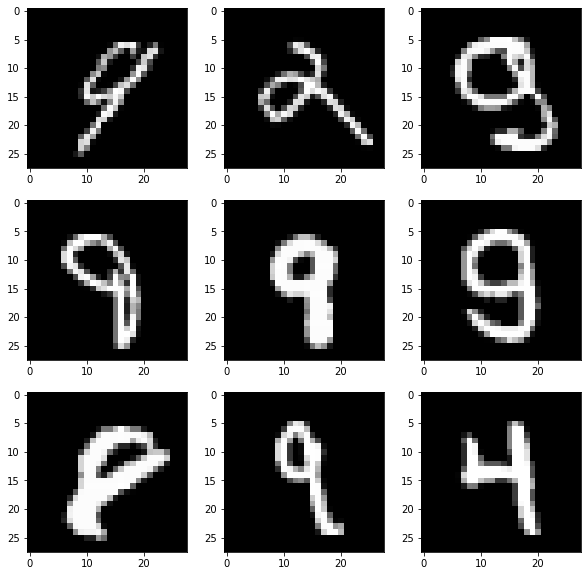

In [ ]:
ypred = predict(Xtest,weights)
ypred[ypred>=1/2] = 1
ypred[ypred<1/2] = 0
print("The test error rate is", norm(ytest-ypred,1)/1000)
fig, axs = plt.subplots(3, 3, figsize=(10,10))
axs = axs.ravel()
index = where(ytest - ypred!=0)[0]
for i in range(9):
    axs[i].imshow(Xte[index[i]], cmap=pyplot.get_cmap('gray'))

### **Your Answer:**






## Q4: Support Vector Machine (45pt)


---

### 1. Data preparation for training and testing (5pt) (*)
Remember in SVM we move the interception out and define the class label is $\pm1$. Prepare your matrix $\mathbf{X}$ and your output label $\mathbf{y}$ for the training data. Don't forget to do the same preparation for the testing data.

Can you impose the hard margin classifier for this problem? Why or why not?


In [ ]:
 #@title Q4.1 your code starts here
Xtrain = Xtr.reshape(Xtr.shape[0],Xtr.shape[1]*Xtr.shape[2])
ytrain = Ytr
ytrain[Ytr==0] = -1
print(Xtrain.shape)

Xtest = Xte.reshape(Xte.shape[0],Xte.shape[1]*Xte.shape[2])
ytest = Yte
ytest[Yte==0] = -1
print(Xtest.shape)


(6000, 784)
(1000, 784)


### **Your Answer:**



---


### 2. Soft Margin with Hinge Loss (15pt) (***)
Perform the soft margin with hinge loss using stochastic gradient descent method.
$$\boxed{\min_{\mathbf{w}\in \mathbb{R}^d, w_0\in \mathbb{R}} \lambda\sum_{i=1}^N \max\left\{0, 1-\mathbf{y}^{(i)}(\mathbf{w}^\top \mathbf{x}^{(i)}+w_0)\right\} +\frac{1}{2} \|\mathbf{w}\|_2^2 }$$
The learning rate is $\eta_t = \frac{1}{(1+2t)^2}$ and total iteration number is $100$. The regulation parameter $\lambda$ is selected as follows,
$$ \lambda\in \{10^{-4},10^{-3},10^{-2},10^{-1},1,10,100,1000,10000 \}$$
Report the test error rates for each $\lambda$ and find the best parameter $\lambda$.
You might need to restart the training with better initial conditions.


In [ ]:
 #@title Q4.2 your code starts here
def predict(x, w, w0):
	activation = x.dot(w)+w0
	return activation
def train_weights(X, y, learning_rate_span,lambda_param, n_iter=1000):
  N,d = X.shape
  w   = ones(784)
  w0  = 0
  for iter in range(n_iter):
    learning_rate = learning_rate_span[iter]
    arr = np.arange(N)
    random.shuffle(arr)
    for i in arr:
          condition = y[i] * (w.dot(X[i,:])+w0) >= 1
          if condition:
            w = w - learning_rate *  w

          else:
            w  = w - learning_rate * (w - lambda_param *y[i] * X[i,:] )
            w0 = w0 - learning_rate * ( -lambda_param * y[i] )
  return w, w0

L=[10**-4, 10**-3, 10**-2, 10**-1, 1, 10, 100, 1000, 10000]
errors = []
n_iter = 100
n_span = arange(n_iter)
learning_rate_span = 1/((1+ 2*n_span)**2)

for l in L:
  w,w0 = train_weights(Xtrain, ytrain, learning_rate_span, l, n_iter)
  ypred = predict(Xtest, w, w0)
  ypred[ypred>=0] = 1
  ypred[ypred<=0] = -1
  error = norm(ypred-ytest,0)/1000
  errors.append(error)
  print('For lambda =', l, 'the test error rate is', error)
#The best lambda is 0.001



For lambda = 0.0001 the test error rate is 0.087
For lambda = 0.001 the test error rate is 0.039
For lambda = 0.01 the test error rate is 0.044
For lambda = 0.1 the test error rate is 0.059
For lambda = 1 the test error rate is 0.07
For lambda = 10 the test error rate is 0.063
For lambda = 100 the test error rate is 0.147
For lambda = 1000 the test error rate is 0.061
For lambda = 10000 the test error rate is 0.057


### **Your Answer:**



---


### 3. Prepare for soft margin with log loss (10pt) (*)
Please compute the following two gradient:
$$ \nabla_\mathbf{w} \log\left(1+e^{-y^{(i)}(\mathbf{w}^\top\mathbf{x}^{(i)}+w_0 )}\right)= $$

$$ \nabla_{w_0}\log\left(1+e^{-y^{(i)}(\mathbf{w}^\top\mathbf{x}^{(i)}+w_0 )}\right)=$$

### **Your Answer:**
$$ \nabla_\mathbf{w} \log\left(1+e^{-y^{(i)}(\mathbf{w}^\top\mathbf{x}^{(i)}+w_0 )}\right)=   \frac{-y^{(i)}\mathbf{x}^{(i)}}{1+e^{y^{(i)}(\mathbf{w}^\top\mathbf{x}^{(i)}+w_0 )}} $$

 $$ \nabla_{w_0}\log\left(1+e^{-y^{(i)}(\mathbf{w}^\top\mathbf{x}^{(i)}+w_0 )}\right)=  \frac{-y^{(i)}}{1+e^{y^{(i)}(\mathbf{w}^\top\mathbf{x}^{(i)}+w_0 )}}  $$



---


### 4. Soft Margin with Log Loss (15pt) (***)
Perform the soft margin with log loss using stochastic gradient descent method.
$$\boxed{\min_{\mathbf{w}\in \mathbb{R}^d, w_0\in\mathbb{R}}  \lambda \sum_{i=1}^N\log\left(1+e^{-y^{(i)}(\mathbf{w}^\top\mathbf{x}^{(i)}+w_0 )}\right)  +\frac{1}{2}\|\mathbf{w}\|_2^2 } $$
Similarly, the learning rate is $\eta_t = \frac{1}{(1+2t)^2}$ and total iteration number is $100$. The regulation parameter $\lambda$ is selected as follows,
$$ \lambda\in \{10^{-4},10^{-3},10^{-2},10^{-1},1,10,100,1000,10000 \}$$
Report the test error rates for each $\lambda$ and find the best parameter $\lambda$.
You might need to restart the training with better initial conditions.


In [ ]:
def predict(x, w, w0):
	activation = x.dot(w)+w0
	return activation
def train_weights_L(X, y, learning_rate_span,lambda_param, n_iter=1000):
  N,d = X.shape
  w   = ones(784)
  w0  = 0
  for iter in range(n_iter):
    learning_rate = learning_rate_span[iter]
    arr = np.arange(N)
    random.shuffle(arr)
    for i in arr:
      denom = 1 + np.exp( clip(y[i] * (w.dot(X[i,:]) + w0),-200,200) )
      w  = w - learning_rate * ( (-lambda_param * y[i] * X[i,:]) / denom + w)
      w0 = w0 - learning_rate * ( (-lambda_param * y[i]) / denom )
  return w, w0

L=[10**-4, 10**-3, 10**-2, 10**-1, 1, 10, 100, 1000, 10000]
errors = []
n_iter = 100
n_span = arange(n_iter)
learning_rate_span = 1/((1+ 2*n_span)**2)

for l in L:
  w,w0 = train_weights_L(Xtrain, ytrain, learning_rate_span, l, n_iter)
  ypred = predict(Xtest, w, w0)
  ypred[ypred>=0] = 1
  ypred[ypred<=0] = -1
  error = norm(ypred-ytest,0)/1000
  errors.append(error)
  print('For lambda =', l, 'the test error rate is', error)


For lambda = 0.0001 the test error rate is 0.09
For lambda = 0.001 the test error rate is 0.046
For lambda = 0.01 the test error rate is 0.038
For lambda = 0.1 the test error rate is 0.054
For lambda = 1 the test error rate is 0.053
For lambda = 10 the test error rate is 0.076
For lambda = 100 the test error rate is 0.066
For lambda = 1000 the test error rate is 0.058
For lambda = 10000 the test error rate is 0.05


### **Your Answer:**